<a href="https://colab.research.google.com/github/gumdropsteve/intro_to_machine_learning/blob/main/day_12/02_pca_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_curve, roc_auc_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

<center><H1>PCA With Diabetes Dataset</H1></center>

<p align="center">
  <img width="500" height="200" src="https://i.gifer.com/H7zW.gif">
</p>


👉🏼 [Data Dictionary](https://www.kaggle.com/uciml/pima-indians-diabetes-database) 👈🏼

<center><H3>Steps (Must be performed in this order)</H></center>

1. [Split Data](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
2. EDA (Show us your opinion of the 2 best plots explaining the most important insights int the data). 
    - **Plots Require**:
        - Title
        - Axis Labels
        - Legend
        - A short explanation why it is important as if you were explaining it to someone who has never seen the plot before and is unfamiliar with the data.
3. Determine Baseline Model
4. [Scale Data](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
5. [Create Logistic Regression Model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
6. Compare Results to Baseline
7. [Perform PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
8. Use Your Principal Components for a Logistic Regression Model
9. Compare Results to Baseline and previous Logistic Regression Model without PCA and provide an explanation of what the results mean and the point of PCA

✨BONUS✨
 - Create a Scree Plot (You will probably have to research this)

### **We want to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements.**



---
---


* Pregnancies: Number of times pregnant

* Glucose: The plasma glucose concentration in the oral glucose tolerance test after two hours

* BloodPressure: Diastolic blood pressure (mm Hg)

* SkinThickness: Triceps skin fold thickness (mm)

* Insulin: 2-Hour serum insulin (mu U/ml)

* BMI: Body mass index (weight in kg/(height in m)^2)

* DiabetesPedigreeFunction: This function calculates the likelihood of having diabetes based on the lineage of a descendant

* Age: Age (years)

* Outcome: Class variable (have the disease (1) or not (0))

In [46]:
df = pd.read_csv("https://raw.githubusercontent.com/mpHarm88/datasets/master/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [47]:
# totat rows and column in the data: / or the size of the data
df.shape

(768, 9)

In [48]:
# column name of the data:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [49]:
#number of unique values in column
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [50]:
# describe the data:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [51]:
# data type:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [52]:
#checking duplicate values in dataset
df.duplicated().sum()

0

In [53]:
# checking null values in dataset
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [54]:
# Check the classes of the outcome variable
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# **EDA**

Text(0.5, 1.0, 'correlation of feature')

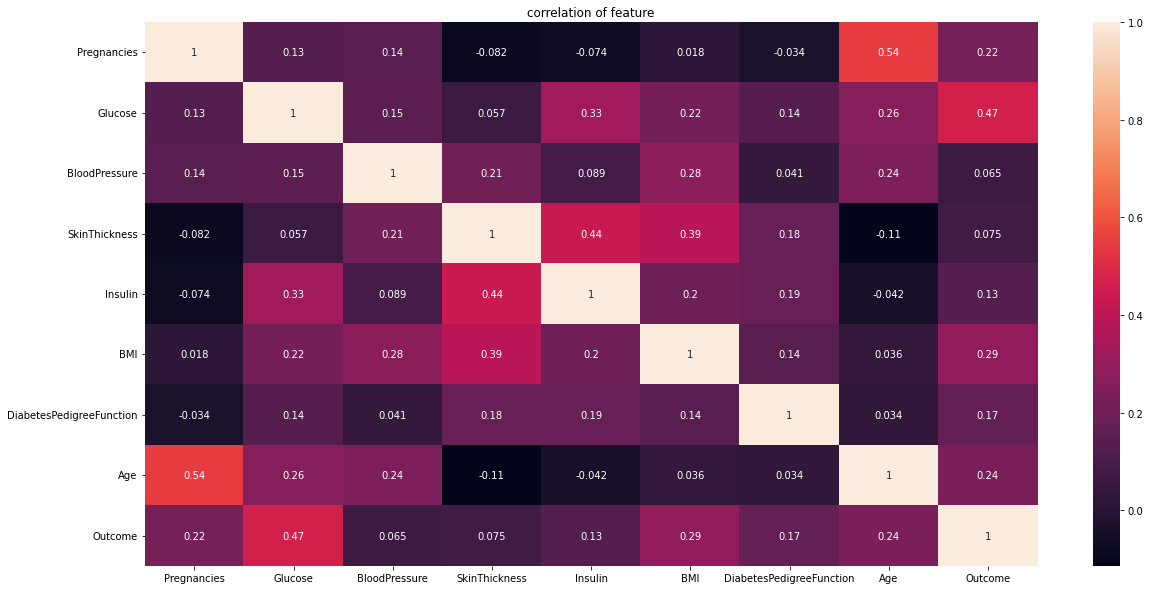

In [24]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot=True)
plt.title("correlation of feature")

* The above plot is the Heatmap of correlation that shows 
Glucose, BMI, Age, Insullin, DiabetesPedigreeFunction ,are 5 features that will determined the (Outcome) of the  patient 

* for Glucose, Insulin the patients should to keep the BMI in check to avoid High levels of Glucose and Insulin, and keep the Glucose and Insulin levels in check as age progresses. espacily Pregnant Ladies, also shoul keep a close watch on their Glucose and Insulin Levels



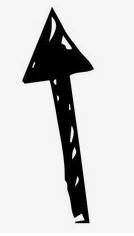

In [ ]:
sns.histplot(data=df, x='Age', hue='Outcome')
plt.title("Data distribution of Age column")


* The above plot is the Data distribution of Age column
and the all patients here in the data are females the patients age between 22 and 70 years old and it's show the diagnostics patients in age from 45 until 55 has diabetes.

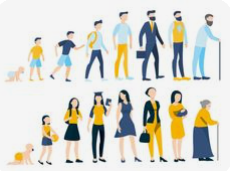

In [ ]:
sns.histplot(data=df, x='Pregnancies', hue='Outcome')
plt.title("Data distribution of Age column")


* From the above plot we can know is when the number of pregnancies increases will increases the risk of diabetes.
    
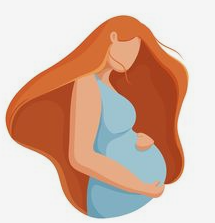

Text(0.5, 1.0, 'Data distribution of Age column')

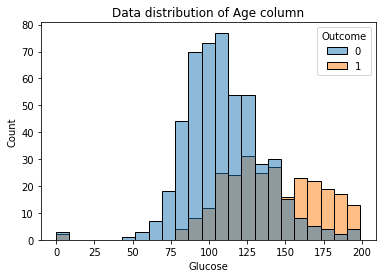

In [19]:
sns.histplot(data=df, x='Glucose', hue='Outcome')
plt.title("Data distribution of Age column")


* From the above plot we can know is when the level of Glucose increase more than 140 will increases the risk of diabetes.



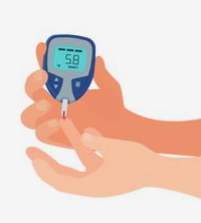

Text(0.5, 1.0, 'Data distribution of Age column')

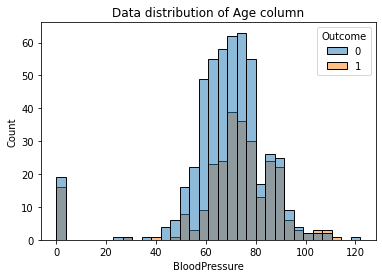

In [20]:
sns.histplot(data=df, x='BloodPressure', hue='Outcome')
plt.title("Data distribution of Age column")


* From the above plot we can know is when the blood pressure between 60 to 90 will increases the risk of diabetes.
 
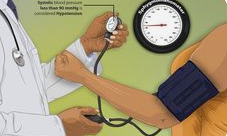

Text(0.5, 1.0, 'Data distribution of Age column')

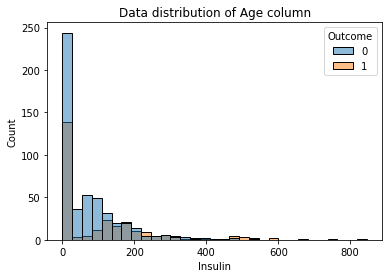

In [21]:
sns.histplot(data=df, x='Insulin', hue='Outcome')
plt.title("Data distribution of Age column")


* From the above plot we can know is when the  insulin level increase will increases the risk of diabetes.

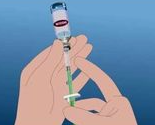

Text(0.5, 1.0, 'Data distribution of Age column')

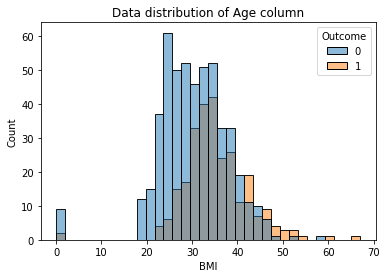

In [25]:
sns.histplot(data=df, x='BMI', hue='Outcome')
plt.title("Data distribution of Age column")


* From the above plot we can know is when BMI increase above 30 will increases the risk of diabetes.
    

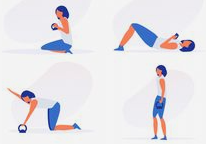

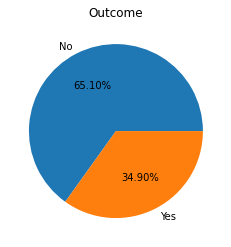

In [26]:
plt.title('Outcome')
plt.pie(df['Outcome'].value_counts(),labels=['No','Yes'], autopct='%1.2f%%')
plt.show()

* The above plot show percentsge of the patients who's diagnostically as have the disease the 1 notation and have't disease with notation 0.



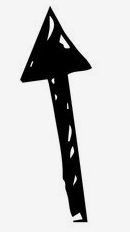

### **Separating target variable**

In [56]:
#split dataset in features and target variable:
x= df.iloc[:,:8] #feature
y=df['Outcome'] # target

In [57]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [58]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [79]:
# Baseline 
df["Outcome"].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

### **Scaling the Data**

In [30]:
# Instantiate Standard Scaler
scaler = StandardScaler()

# Fit & transform data
scaled_df = scaler.fit_transform(x)

### **Spliting Data**

In [31]:
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.02, random_state=123)

In [32]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((752, 8), (16, 8), (752,), (16,))

## **Logistic Regression model**

In [33]:
#fitting data in Logisticregression

logreg = LogisticRegression()
logreg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [34]:
#predicting data with the help of logistic regression

Ypred = logreg.predict(x_test)

### **Performance Analysis**

In [35]:
logistic_regression_acc = accuracy_score(y_test,Ypred)
logistic_regression_acc

0.875

In [36]:
cm = confusion_matrix(y_test,Ypred)
cm

array([[7, 2],
       [0, 7]])

In [37]:
clsl = classification_report(y_test,Ypred)
print(clsl)

              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.78      1.00      0.88         7

    accuracy                           0.88        16
   macro avg       0.89      0.89      0.88        16
weighted avg       0.90      0.88      0.88        16



In [38]:
f1_score(y_test,Ypred)

0.8750000000000001

## **PCA**

#### Scale Data

In [64]:
#split dataset in features and target variable:
xx= df.iloc[:,:8] #feature
yy=df['Outcome'] # target

In [65]:
xx

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [66]:
yy

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [67]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(xx)

#### Apply PCA

In [68]:
# Instantiate & fit data using PCA
pca = PCA()
pca.fit(scaled_df)

PCA()

#### Scree Plot


In [69]:
pd.Series(pca.explained_variance_ratio_) 

0    0.261797
1    0.216401
2    0.128704
3    0.109441
4    0.095293
5    0.085329
6    0.052477
7    0.050558
dtype: float64

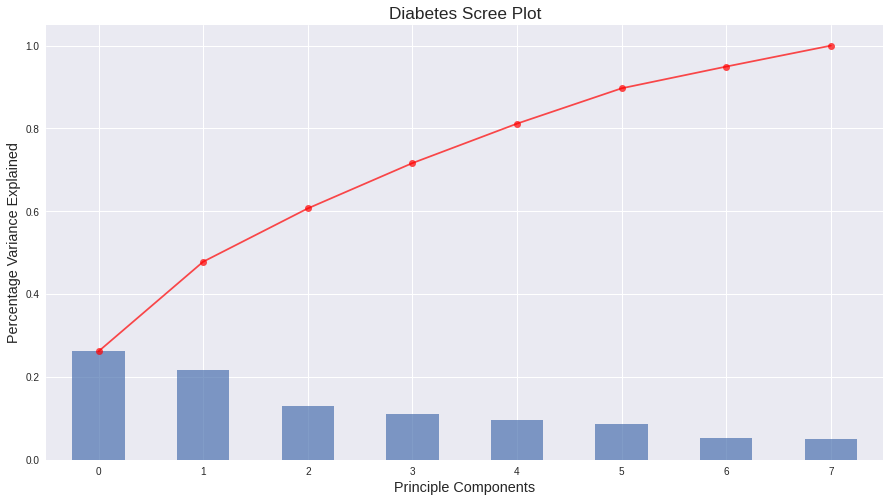

In [70]:
plt.style.use("seaborn")
plt.figure(figsize=(15,8))

exp_var = pd.Series(pca.explained_variance_ratio_) 
exp_var.plot(kind="bar", alpha=0.7) # plot bar chart

# Calculate the amount of variance explained added by each additional component
total = 0
var_ls = []
for x in exp_var:
    total = total+x
    var_ls.append(total)

pd.Series(var_ls).plot(marker="o", alpha=0.7, color = 'red' ) #plot line chart of increasing variances

plt.xlabel("Principle Components", fontsize="x-large")
plt.ylabel("Percentage Variance Explained", fontsize="x-large")
plt.title("Diabetes Scree Plot", fontsize="xx-large")
plt.show();

#### Split Data into Training and Testing Sets

In [71]:
# Train test split
xx_train, xx_test, yy_train, yy_test = train_test_split(xx, yy, random_state= 42)


#### Scale Data

In [72]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
X_train_sc = scaler.fit_transform(xx_train)

X_test_sc = scaler.transform(xx_test)

#### Fit PCA & Apply the Results to a Logistic Regression Model

In [74]:
# fit PCA
pca = PCA(n_components = 4)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

# Created two model to compare training time
logreg_noPCA = LogisticRegression(max_iter=2085) # Set max_iter so model reaches convergence

logreg = LogisticRegression()

#### Comparing Training Times


In [76]:
# Measure how long it takes to train without PCA

%timeit logreg_noPCA.fit(xx_train, yy_train)

43.1 ms ± 1.34 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [77]:
# Measure how long it takes to train with PCA

%timeit logreg.fit(X_train_pca, yy_train)

2.77 ms ± 76.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


#### Evaluate Model
4 features 
it's not good actually

In [78]:
print('Training accuracy:', logreg.score(X_train_pca, yy_train))
print('Testing accuracy:', logreg.score(X_test_pca, yy_test))

Training accuracy: 0.7326388888888888
Testing accuracy: 0.6927083333333334


In [80]:
print('Training accuracy:', logreg_noPCA.score(xx_train, yy_train))
print('Testing accuracy:', logreg_noPCA.score(xx_test, yy_test))

Training accuracy: 0.78125
Testing accuracy: 0.7239583333333334


# **For some reason the result with using pca worst and without sign pca is better and considered as high accuracy**